### Источник данных
Источником данных для опытов по классификации изображений воспользуюсь данными CIFAR-10. Этот набор данных содержит 60000 изображений размером 32х32 пикселя. Изображения относятся к одной из 10 категорий.

In [1]:
import random
import numpy as np
from lib.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# Изменяю некоторые параметры вывода изображений
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [3]:
# Загружаю CIFAR-10
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Для проверки, вывожу размерность обучающей и конторольной выборок
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


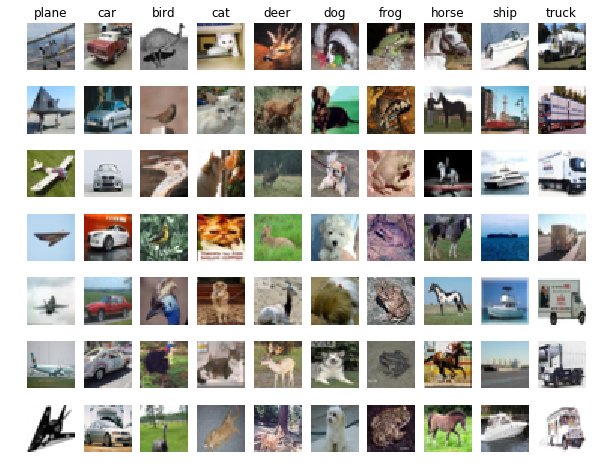

In [4]:
# Визуализация набора данных
# Выведу по несколько изображений каждого класса из обучающей выборки
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
# Преобразую изображения в строки
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [24]:
# Subsample the data for more efficient code execution in this exercise
num_training = 20000
mask = list(range(num_training))
X_train_s = X_train[mask]
y_train_s = y_train[mask]

num_test = 2000
mask = list(range(num_test))
X_test_s = X_test[mask]
y_test_s = y_test[mask]

In [25]:
from lib.classifiers import KNearestNeighbor

# Создаю объект kNN классификатора
classifier = KNearestNeighbor()
classifier.train(X_train_s, y_train_s)

In [26]:
# Вычесляю L2 расстояние
%time dists = classifier.compute_distances_L2(X_test_s)
print(dists.shape)

CPU times: user 10.7 s, sys: 1.09 s, total: 11.8 s
Wall time: 3.83 s
(2000, 20000)


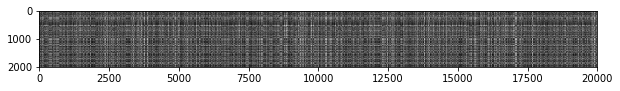

In [27]:
# Изображаю матрицу расстояний.
plt.imshow(dists, interpolation='none')
plt.show()

In [28]:
# Now implement the function predict_labels and run the code below:
# We use k = 1 (which is Nearest Neighbor).
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test_s)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 616 / 2000 correct => accuracy: 0.308000


In [29]:
# Кросс-валидация
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = np.split(X_train_s, num_folds)
y_train_folds = np.split(y_train_s, num_folds)

k_to_accuracies = {}

classifier = KNearestNeighbor()
for k in k_choices:
    accuracy = []
    for i in range(num_folds):
        X_train_CV = np.vstack(X_train_folds[:i] + X_train_folds[i+1:])
        y_train_CV = np.hstack(y_train_folds[:i] + y_train_folds[i+1:])
        classifier.train(X_train_CV, y_train_CV)
        X_test_CV = X_train_folds[i]
        y_test_CV = y_train_folds[i]
        accuracy.append(np.mean(classifier.predict(X_test_CV, k) == y_test_CV))
    k_to_accuracies[k] = accuracy
    
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

k = 1, accuracy = 0.307000
k = 1, accuracy = 0.301750
k = 1, accuracy = 0.298000
k = 1, accuracy = 0.316500
k = 1, accuracy = 0.296000
k = 3, accuracy = 0.301500
k = 3, accuracy = 0.289250
k = 3, accuracy = 0.292750
k = 3, accuracy = 0.286750
k = 3, accuracy = 0.280250
k = 5, accuracy = 0.310750
k = 5, accuracy = 0.304000
k = 5, accuracy = 0.300750
k = 5, accuracy = 0.303500
k = 5, accuracy = 0.291500
k = 8, accuracy = 0.322000
k = 8, accuracy = 0.306500
k = 8, accuracy = 0.301250
k = 8, accuracy = 0.308000
k = 8, accuracy = 0.293000
k = 10, accuracy = 0.317750
k = 10, accuracy = 0.312500
k = 10, accuracy = 0.299750
k = 10, accuracy = 0.305500
k = 10, accuracy = 0.290000
k = 12, accuracy = 0.312500
k = 12, accuracy = 0.308250
k = 12, accuracy = 0.304500
k = 12, accuracy = 0.305750
k = 12, accuracy = 0.289250
k = 15, accuracy = 0.312250
k = 15, accuracy = 0.309500
k = 15, accuracy = 0.303000
k = 15, accuracy = 0.307000
k = 15, accuracy = 0.290250
k = 20, accuracy = 0.310750
k = 20, accu

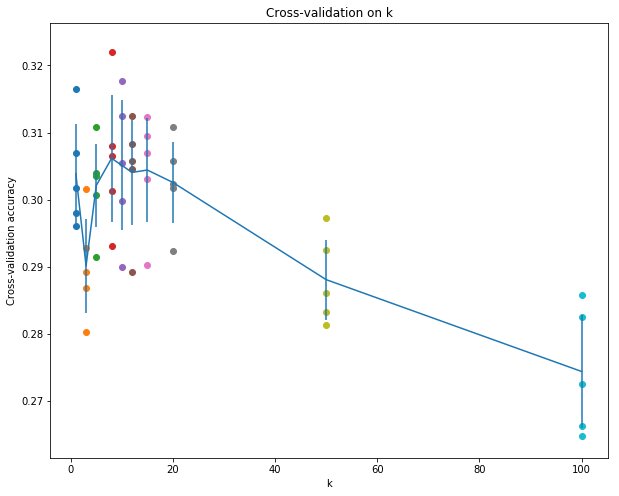

In [30]:
# plot the raw observations
for k in k_choices:
    accuracies = k_to_accuracies[k]
    plt.scatter([k] * len(accuracies), accuracies)

# plot the trend line with error bars that correspond to standard deviation
accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

In [31]:
# Based on the cross-validation results above, choose the best value for k,   
# retrain the classifier using all the training data, and test it on the test
# data. You should be able to get above 28% accuracy on the test data.
best_k = 8

classifier = KNearestNeighbor()
classifier.train(X_train_s, y_train_s)
y_test_pred = classifier.predict(X_test_s, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test_s)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 611 / 2000 correct => accuracy: 0.305500


In [32]:
# Сравниваю с L1 классификатором
# Создаю объект kNN классификатора
classifier = KNearestNeighbor()
classifier.train(X_train_s, y_train_s)
y_pred = classifier.predict(X_test_s, distance_type='L1')
np.mean(y_pred == y_test_s)

0.339